# MNIST-Digit Recognizer
use Classifiers to identify digits from thousands of hand written images.

In [97]:
#import needed and potentially need libraries, packages and classifiers
import numpy as np
import pandas as pd 
import matplotlib
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
%matplotlib inline
knn= KNeighborsClassifier(n_neighbors=10, algorithm="auto", n_jobs=4)

In [98]:
data=pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [99]:
print(data)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7          3       0       0       0       0       0       0       0       0   
8          5       0       0       0       0       0       0       0       0   
9          3       0       0       0       0       0       0       0       0   
10         8       0       0       0       0       0       0       0       0   
11         9       0       0       0    

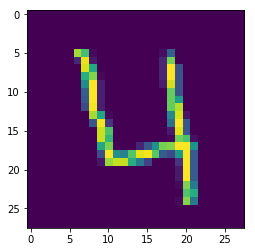

In [100]:
alph=data.iloc[3,1:].values
alph=alph.reshape(28,28).astype('uint8')
plt.imshow(alph)

In [101]:
labels= data['label'].as_matrix()
features= data.as_matrix()[:, 1:]

In [102]:
print(labels)

[1 0 1 ..., 7 6 9]


In [103]:
print(features)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


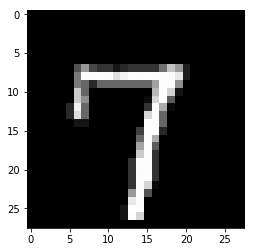

In [104]:
plt.figure(5)
plt.imshow(features[6, :].reshape(28,28), cmap='gray', interpolation=None)
plt.show()

In [105]:
test=pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [106]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [107]:
#create an accuracy function 
def acc(pred):
    i=0
    for i in range(len(pred)):
        if pred[i]==data["label"][i]:
            i+=1
    a = float(i)/len(pred)
    return a

In [108]:

pred = []
for i in range(784):
    s = "pixel"+str(i)
    pred.append(s)

In [109]:
#using random forest classifier and cross validation to make predictions.
clf = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=2, min_samples_leaf=1)


In [110]:
points = cross_validation.cross_val_score(clf, data[pred], data["label"], cv=3)

In [111]:
complete_pred = []
clf.fit(data[pred], data["label"])
predn = clf.predict_proba(data[pred]).astype(float)
predn

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.99333333,
         0.00666667,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.00666667, ...,  0.03333333,
         0.00666667,  0.88666667]])

In [112]:
predn = predn.argmax(axis=1)
predn

array([1, 0, 1, ..., 7, 6, 9])

In [113]:
data=pd.read_csv('train.csv')

complete_pred = []
clf.fit(data[pred], data["label"])
predn = clf.predict_proba(test[pred]).astype(float)
predn = predn.argmax(axis=1)
predn


array([2, 0, 9, ..., 3, 9, 2])

In [114]:
#create result file
sub = pd.DataFrame({
    "ImageId": range(1,28001),
    "Label": predn
})

sub.to_csv('sub.csv', index=False)